## Lab 5 – Data Preprocessing using Python
* Outcome A:  Learning Data Preprocessing steps
* Outcome B: Applying Data preprocessing techniques to get cleaned data

### Exercise:
- Load data in Pandas.
- Drop columns that aren't useful.
- Drop rows with missing values/Filling missing values using mean
- Convert categorical values to numeric values.
- Apply feature scaling/normalization



In [1]:
import pandas as pd
import numpy as np

#  Load data in Pandas.

In [2]:
df2=pd.read_csv(r'/Users/maryam/Data-Mining/Data/bank.csv',sep=';')

In [3]:
df=df2.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# Drop columns that aren't useful.

In [6]:
df = df.drop('default', axis=1)

In [7]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
df = df.drop('campaign', axis=1)

In [9]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,339,4,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,330,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,30,jul,329,-1,0,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,9,may,153,-1,0,unknown,no
4518,57,technician,married,secondary,295,no,no,cellular,19,aug,151,-1,0,unknown,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,6,feb,129,211,3,other,no


# Convert categorical values to numeric values.

In [10]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [11]:
df["job"].replace({
    'unknown': np.nan,
    'management': 0,
    'technician': 1,
    'entrepreneur': 2,
    'blue-collar': 3,
    'retired': 4,
    'admin.': 5,
    'services': 6,
    'self-employed': 7,
    'unemployed': 8,
    'housemaid': 9,
    'student': 10
}, inplace=True)

In [12]:
def replace_marital(val):
    if val == "single":
        return 0
    else:
        return 1

df["marital"] = df["marital"].apply(replace_marital, 1)

In [13]:
df["housing"] = df["housing"].map({
    "no": 0,
    "yes": 1
}.get)

In [14]:
df["loan"] = df["loan"].replace({
    "no": 0,
    "yes": 1
})

In [15]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [16]:
df["education"].replace({
    'unknown': np.nan,
    'tertiary': 0,
    'secondary': 1,
    'primary': 2
}, inplace=True)

In [17]:
df.contact.replace({"unknown": np.nan,
            "telephone": 0,
            "cellular": 1}, inplace=True)

In [18]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [19]:
df.month = df.month.map({
    'oct': 10, 'may': 5, 'apr': 4, 'jun': 6, 'feb': 2, 'aug': 8, 'jan': 1, 'jul': 7, 'nov': 11,
       'sep': 9, 'mar': 3, 'dec': 12
})

In [20]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [21]:
df.poutcome = df.poutcome.map({
    'unknown': np.nan,
    'failure': 0,
    'other': 1,
    'success': 2
})

In [22]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [23]:
df.y = df.y.map({
    'no': 0,
    'yes': 1
})

In [24]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,30,8.0,1,2.0,1787,0,0,1.0,19,10,79,-1,0,NaN,0
1,33,6.0,1,1.0,4789,1,1,1.0,11,5,220,339,4,0.0,0
2,35,0.0,0,0.0,1350,1,0,1.0,16,4,185,330,1,0.0,0
3,30,0.0,1,0.0,1476,1,1,NaN,3,6,199,-1,0,NaN,0
4,59,3.0,1,1.0,0,1,0,NaN,5,5,226,-1,0,NaN,0


# Check for missing values

In [25]:

missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age             0
job            38
marital         0
education     187
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


# Filling the missing value of column Education and Poutcome with the mean

In [26]:
mean_education = df['education'].mean()

df['education'].fillna(mean_education, inplace=True)


In [27]:
mean_poutcome = df['poutcome'].mean()

df['poutcome'].fillna(mean_education, inplace=True)


In [28]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,30,8.0,1,2.0,1787,0,0,1.0,19,10,79,-1,0,0.844947,0
1,33,6.0,1,1.0,4789,1,1,1.0,11,5,220,339,4,0.000000,0
2,35,0.0,0,0.0,1350,1,0,1.0,16,4,185,330,1,0.000000,0
3,30,0.0,1,0.0,1476,1,1,NaN,3,6,199,-1,0,0.844947,0
4,59,3.0,1,1.0,0,1,0,NaN,5,5,226,-1,0,0.844947,0


In [29]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age             0
job            38
marital         0
education       0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64


# Drop the null value of job and contact column:

In [30]:
df.dropna(subset=['job'], inplace=True)

df.dropna(subset=['contact'], inplace=True)

In [31]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [32]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,30,8.0,1,2.0,1787,0,0,1.0,19,10,79,-1,0,0.844947,0
1,33,6.0,1,1.0,4789,1,1,1.0,11,5,220,339,4,0.000000,0
2,35,0.0,0,0.0,1350,1,0,1.0,16,4,185,330,1,0.000000,0
5,35,0.0,0,0.0,747,0,0,1.0,23,2,141,176,3,0.000000,0
6,36,7.0,1,0.0,307,1,0,1.0,14,5,341,330,2,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,6.0,0,1.0,473,1,0,1.0,7,7,624,-1,0,0.844947,0
4516,33,6.0,1,1.0,-333,1,0,1.0,30,7,329,-1,0,0.844947,0
4518,57,1.0,1,1.0,295,0,0,1.0,19,8,151,-1,0,0.844947,0
4519,28,3.0,1,1.0,1137,0,0,1.0,6,2,129,211,3,1.000000,0


# Apply feature scaling/normalization

In [33]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling/normalization using StandardScaler
scaler = StandardScaler()
numeric_columns = ['age', 'balance']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the final dataset after feature scaling
print("\nFinal dataset after feature scaling:")
df.head()



Final dataset after feature scaling:


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,-1.027136,8.0,1,2.0,0.106459,0,0,1.0,19,10,79,-1,0,0.844947,0
1,-0.755648,6.0,1,1.0,1.079451,1,1,1.0,11,5,220,339,4,0.000000,0
2,-0.574656,0.0,0,0.0,-0.035179,1,0,1.0,16,4,185,330,1,0.000000,0
5,-0.574656,0.0,0,0.0,-0.230620,0,0,1.0,23,2,141,176,3,0.000000,0
6,-0.484160,7.0,1,0.0,-0.373231,1,0,1.0,14,5,341,330,2,1.000000,0


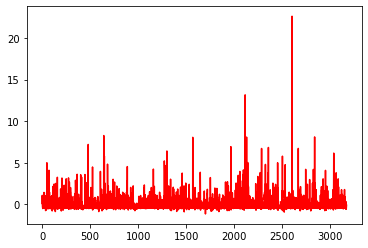

In [34]:
saved_balance = df.balance.values
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(len(saved_balance)), saved_balance, "r")

plt.show()

In [35]:
df["balance"] = df["balance"].apply(lambda v: (v - df["balance"].min()) / (df["balance"].max() - df["balance"].min()))

In [36]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
0,-1.027136,8.0,1,2.0,0.052805,0,0,1.0,19,10,79,-1,0,0.844947,0
1,-0.755648,6.0,1,1.0,0.093776,1,1,1.0,11,5,220,339,4,0.000000,0
2,-0.574656,0.0,0,0.0,0.046840,1,0,1.0,16,4,185,330,1,0.000000,0
5,-0.574656,0.0,0,0.0,0.038611,0,0,1.0,23,2,141,176,3,0.000000,0
6,-0.484160,7.0,1,0.0,0.032605,1,0,1.0,14,5,341,330,2,1.000000,0


# Outliers

<Figure size 2160x1800 with 0 Axes>

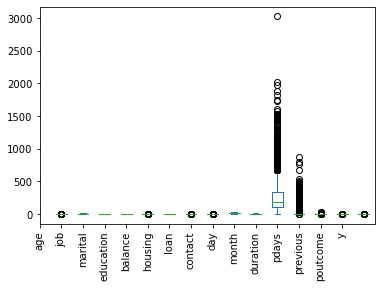

In [44]:

# Set the figure size
plt.figure(figsize=(30, 25))  # Adjust the width and height as desired

# Create the box plot
df.plot.box()

# Set the x-axis tick labels with rotation
plt.xticks(list(range(len(df.columns))), df.columns, rotation='vertical')

# Display the plot
plt.show()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

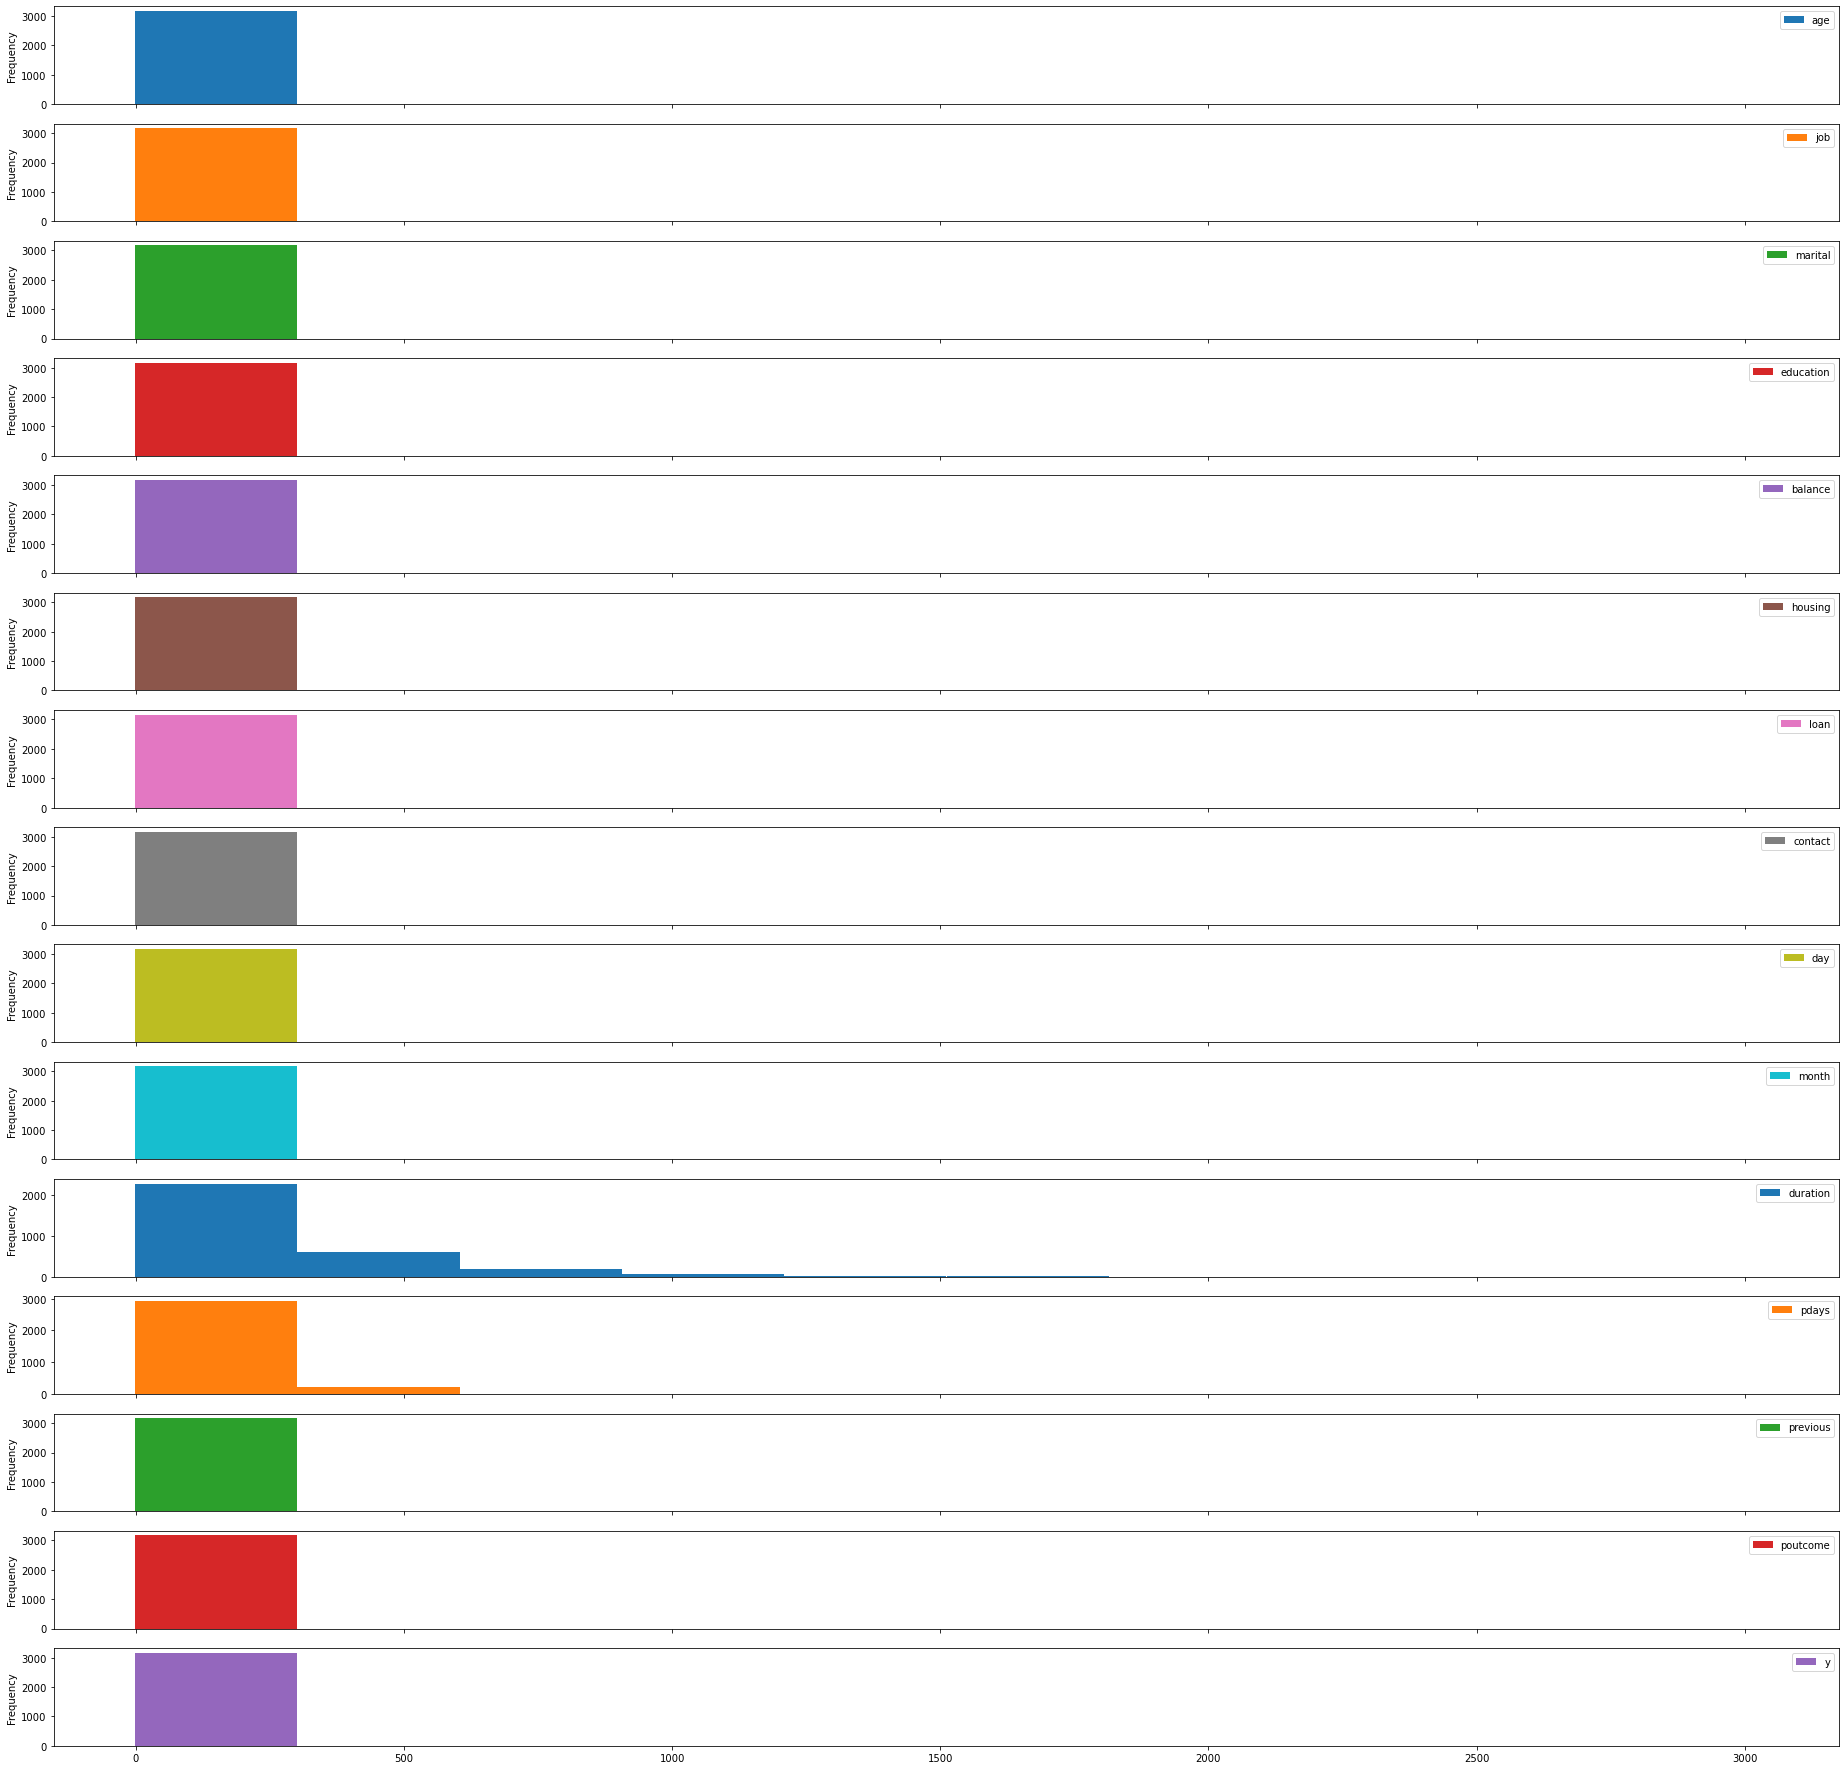

In [38]:
df.plot.hist(subplots=True, figsize=(32, 32))